### Random Matrix Theory

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import subprocess

In [2]:
compiled_dir = f'..{os.sep}compiled'
plot_dir = f'..{os.sep}plots'

In [3]:
program = f'{compiled_dir}{os.sep}exercise_2'

#### Hermitian Matrixx

In [4]:
output_filename = "../data/histogram_hermitian.csv"

In [5]:
output = subprocess.run([
    program,
    "--ndim", "1000",
    "--nsamples", "1000",
    "--output_filename", output_filename
])

 mat_type = hermitian                                         
 output_filename = ../data/histogram_hermitian.csv                   
 ndim =        1000
 nsamples =        1000
 nbins =         100
 min_val =   0.0000000000000000     
 max_val =   5.0000000000000000     


In [6]:
hist = []

with open(output_filename) as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        hist.append(row)

In [7]:
bin_centers = [float(a[1]) for a in hist[1:]]
norm_count = [float(a[3]) for a in hist[1:]]

Confirm the area under the curve is 1.

In [8]:
sum([n * 5/100 for n in norm_count])

0.9980960849999998

Perform fit.

In [9]:
def func(x, a, b, alpha, beta):
    return a * x ** alpha * np.exp(b * x ** beta)

In [10]:
popt, pcov = curve_fit(func, bin_centers, norm_count)

In [11]:
popt

array([13.79272512, -2.82466922,  2.59653888,  1.32155578])

In [12]:
num_pts_interp = 1000
s_interp = np.linspace(bin_centers[0], bin_centers[-1], num_pts_interp)
y_fit = [func(s, *popt) for s in s_interp]

Plot the result.

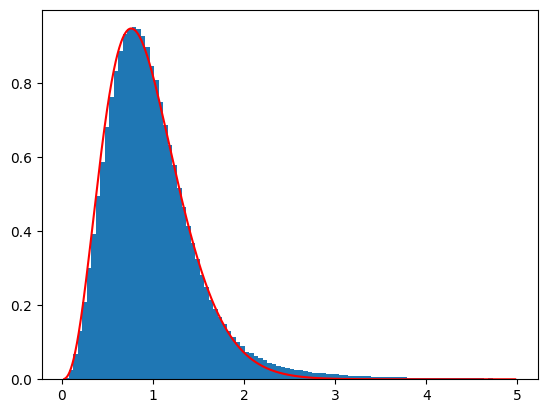

In [13]:
plt.hist(bin_centers, bins=len(norm_count), weights=norm_count)
plt.plot(s_interp, y_fit, 'r');

#### Real Diagonal Matrix

In [14]:
output_filename = "../data/histogram_diagonal.csv"

In [15]:
output = subprocess.run([
    program,
    "--mat_type", "diag",
    "--ndim", "1000",
    "--nsamples", "1000",
    "--output_filename", output_filename
])

 mat_type = diag                                              
 output_filename = ../data/histogram_diagonal.csv                    
 ndim =        1000
 nsamples =        1000
 nbins =         100
 min_val =   0.0000000000000000     
 max_val =   5.0000000000000000     


In [16]:
hist = []

with open(output_filename) as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        hist.append(row)

In [17]:
bin_centers = [float(a[1]) for a in hist[1:]]
norm_count = [float(a[3]) for a in hist[1:]]

In [18]:
sum([n * 5/100 for n in norm_count])

0.9933313299999995

In [19]:
popt, pcov = curve_fit(func, bin_centers, norm_count)

/var/folders/29/57ctygt16nb459fzj64lth0r0000gq/T/ipykernel_45576/300280099.py:2: RuntimeWarning: overflow encountered in exp
  return a * x ** alpha * np.exp(b * x ** beta)


In [20]:
s_interp = np.linspace(bin_centers[0], bin_centers[-1], num_pts_interp)
y_fit = [func(s, *popt) for s in s_interp]

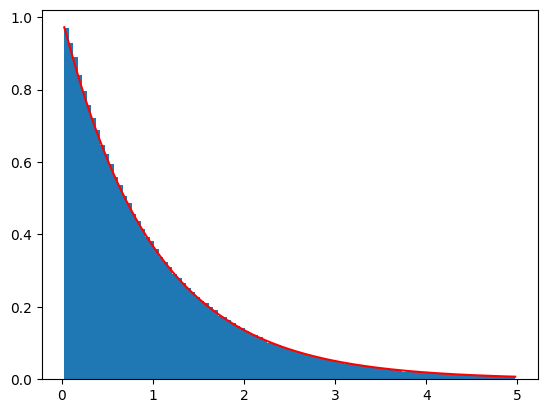

In [21]:
plt.hist(bin_centers, bins=len(norm_count), weights=norm_count)
plt.plot(s_interp, y_fit, 'r');